In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [221]:
df = pd.read_csv("C:/Users/darsh/Desktop/GWU-Team_Magnolia/Airline_data.csv")
#df.head()

df. info()

# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [144]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

##### Arrival in delay has some missing values. Does removing those missing values cause a class imbalance on the target variable?
Or can we impute it with the mean ?

In [147]:
# Delay missing
missing_rows = df[df['Arrival Delay in Minutes'].isnull()]
missing_counts = missing_rows['satisfaction'].value_counts()
# Arrival missing
non_missing_rows = df[~df['Arrival Delay in Minutes'].isnull()]
non_missing_counts = non_missing_rows['satisfaction'].value_counts()

print("Missing Rows Class Distribution:")
print(missing_counts)

print("\nNon-Missing Rows Class Distribution:")
print(non_missing_counts)


Missing Rows Class Distribution:
satisfaction
neutral or dissatisfied    227
satisfied                  166
Name: count, dtype: int64

Non-Missing Rows Class Distribution:
satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64



##### For both missing and non-missing rows, the proportion is almost the same: 57% dissatisfied and 43% satisfied. Hence, removing the Null values will not have any significant class imbalance.


In [223]:
df=df.drop(['id','Unnamed: 0'],axis=1)
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

#### Building box plots to visualize the anomalies in the predictors 

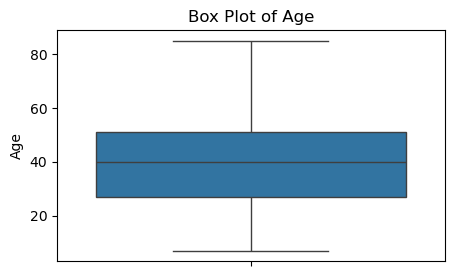

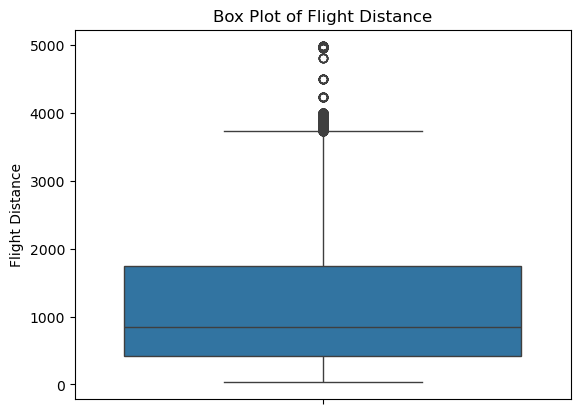

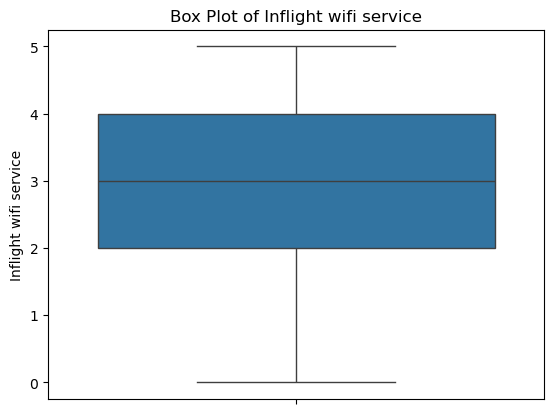

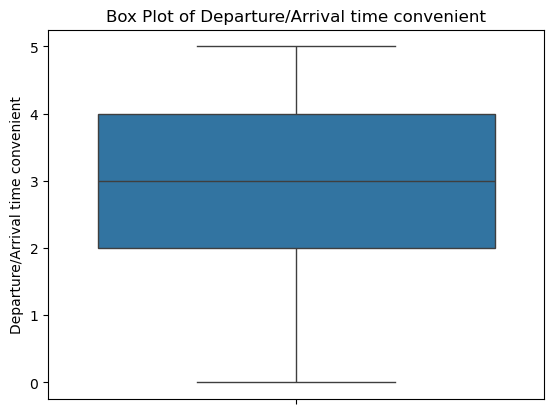

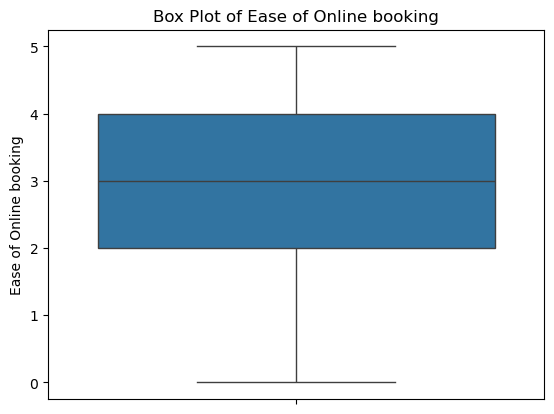

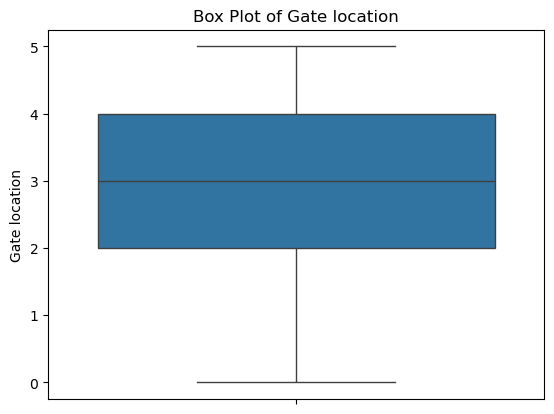

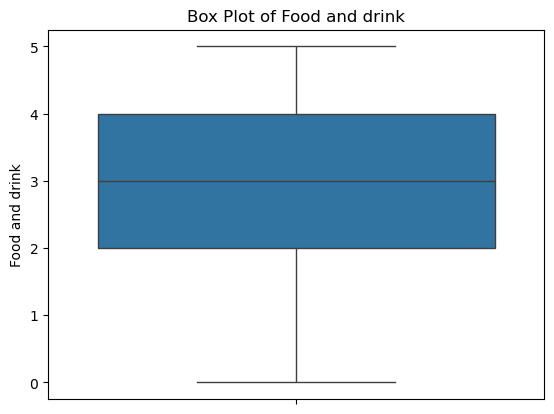

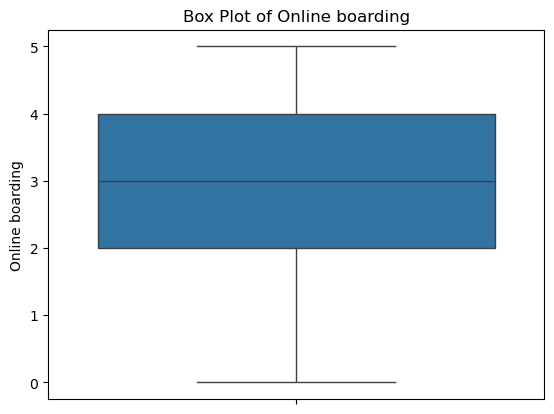

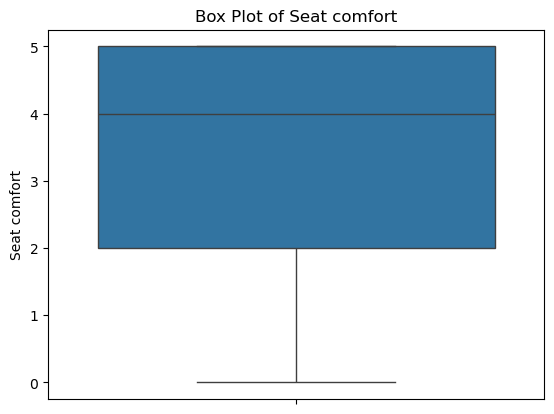

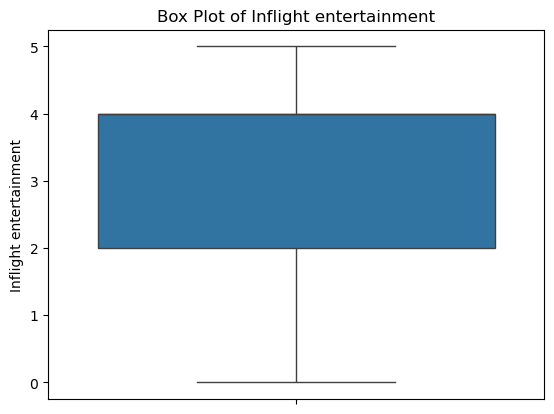

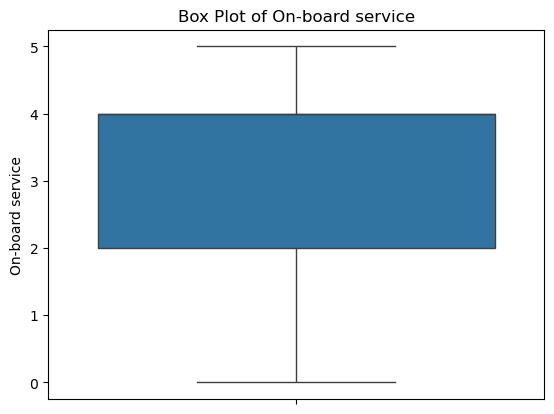

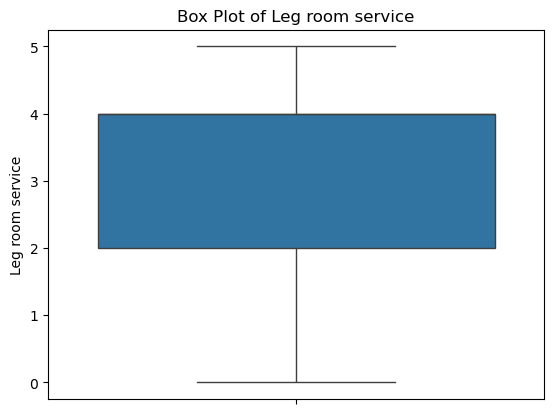

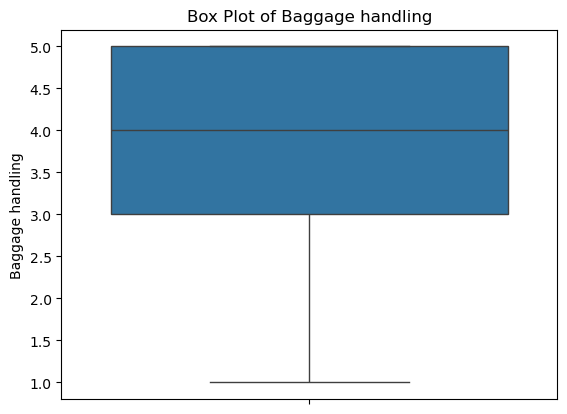

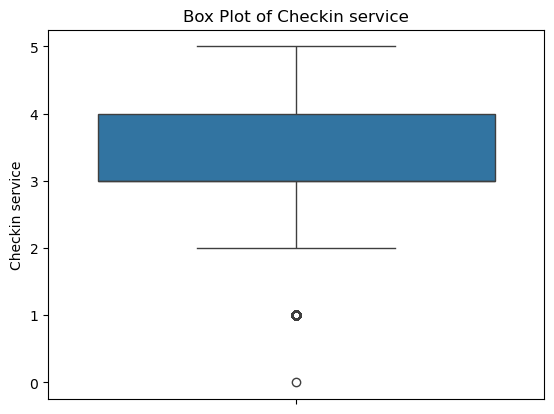

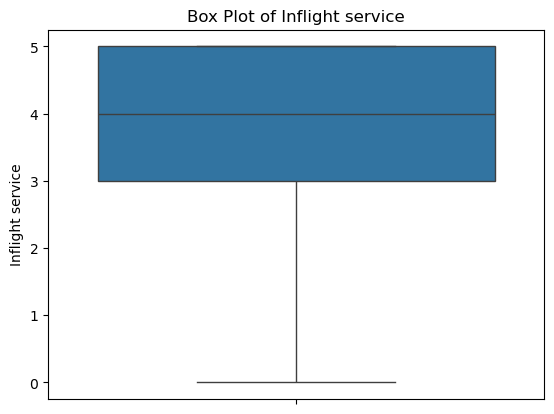

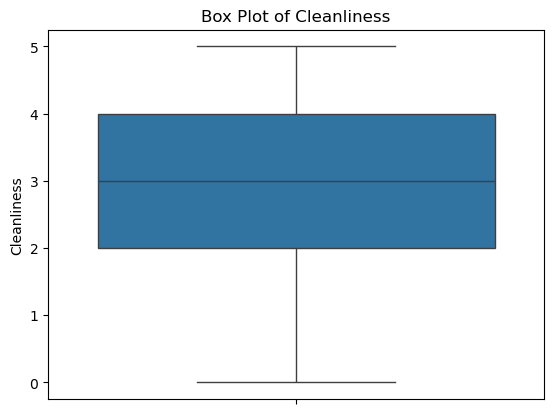

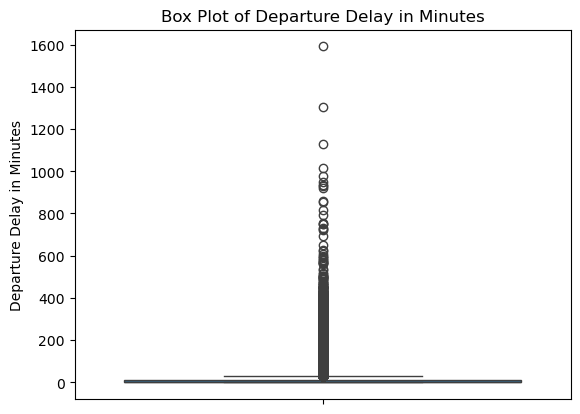

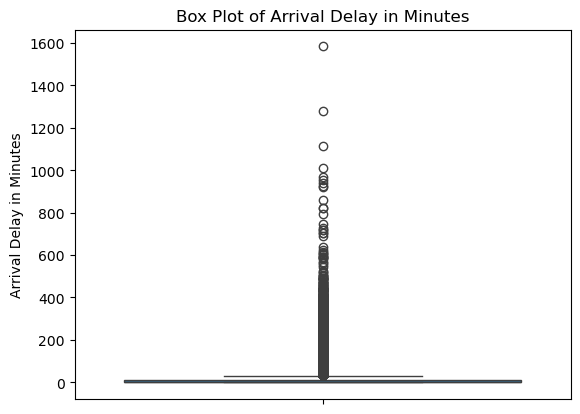

In [9]:
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(5, 3))

for col in numeric_columns:
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [152]:
df['satisfaction'] = df['satisfaction'].replace('neutral or dissatisfied', 'dissatisfied')

print(df['satisfaction'].unique())


['satisfied' 'dissatisfied']


### EDA

### Analysing the satisfaction and dissatisfaction rate for different Age groups.

1. Passengers between the ages of 18 and 30 are the most dissatisfied, while those between the ages of 41 and 50 are the most satisfied.

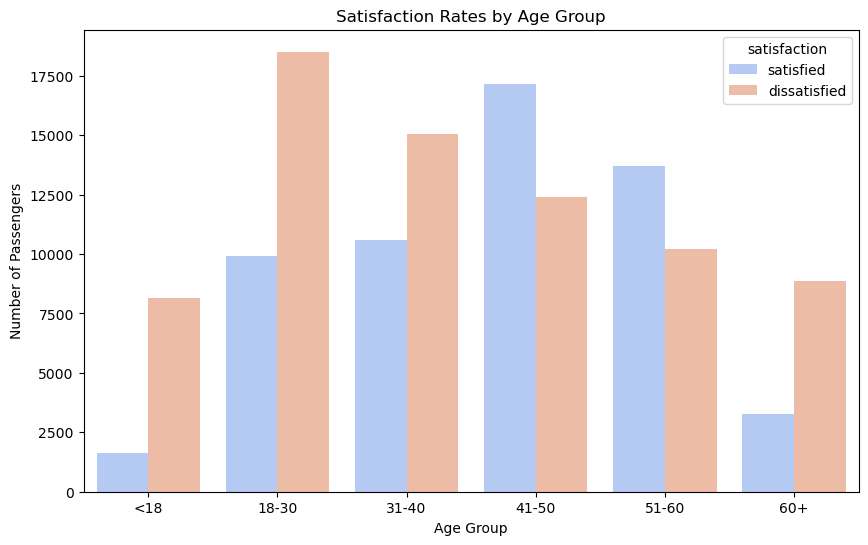

In [102]:
bins = [0, 18, 30, 40, 50, 60, 100]  
labels = ['<18', '18-30', '31-40', '41-50', '51-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age Group', hue='satisfaction', palette='coolwarm')
plt.title('Satisfaction Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.show()

#### Analysing the satisfaction between the loyal and disloyal customers.
1. It is evident that the percentage of dissatisfied customers is considerable for both loyal and disloyal customers. This raises the question of whether loyalty influences satisfaction.

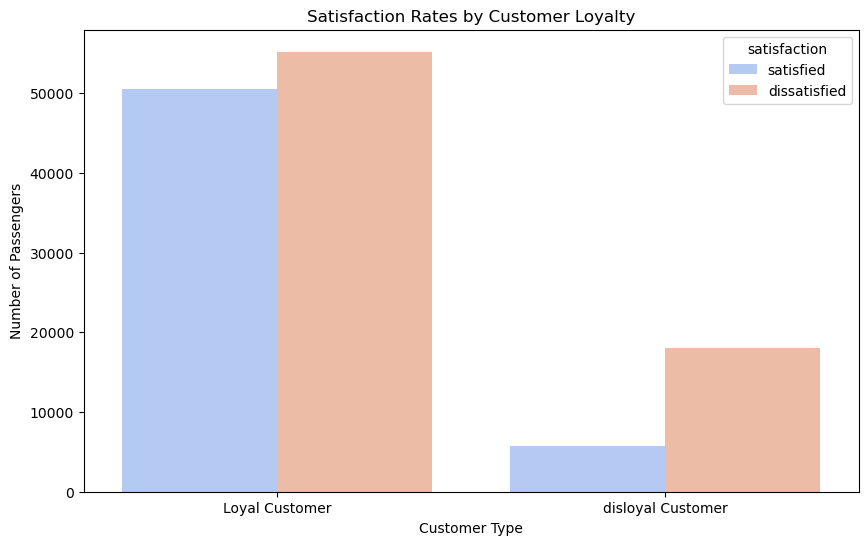

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer Type', hue='satisfaction', palette='coolwarm')
plt.title('Satisfaction Rates by Customer Loyalty')
plt.xlabel('Customer Type')
plt.ylabel('Number of Passengers')
plt.show()

#### Performing statistical test to determine if these predictors are significant in analysing satisfaction rate.
1. The p-value of 0 indicates that these variables are statistically significant .

In [155]:
from scipy.stats import chi2_contingency

contingency_table_age = pd.crosstab(df['Age'], df['satisfaction'])
chi2, p, dof, expected = chi2_contingency(contingency_table_age)
print(f"Chi-square test p-value: {p}")

contingency_table_loyalty = pd.crosstab(df['Customer Type'], df['satisfaction'])
chi2, p, dof, expected = chi2_contingency(contingency_table_loyalty)
print(f"Chi-square test p-value: {p}")


Chi-square test p-value: 0.0
Chi-square test p-value: 0.0


#### Target Variable Distribution

C:\Users\darsh\AppData\Local\Temp\ipykernel_18484\918819013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='satisfaction', palette='coolwarm')


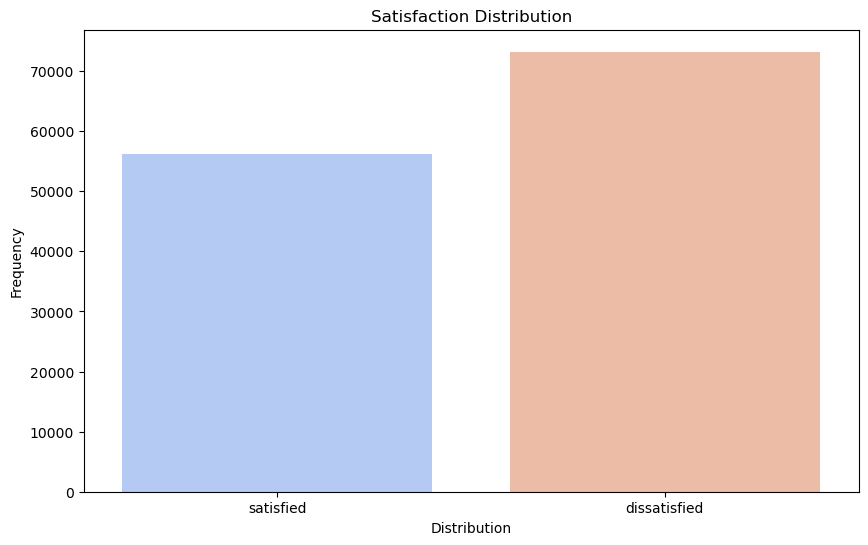

In [157]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='satisfaction', palette='coolwarm')
plt.title('Satisfaction Distribution')
plt.xlabel('Distribution')
plt.ylabel('Frequency')
plt.show()

### Continous variable distribution

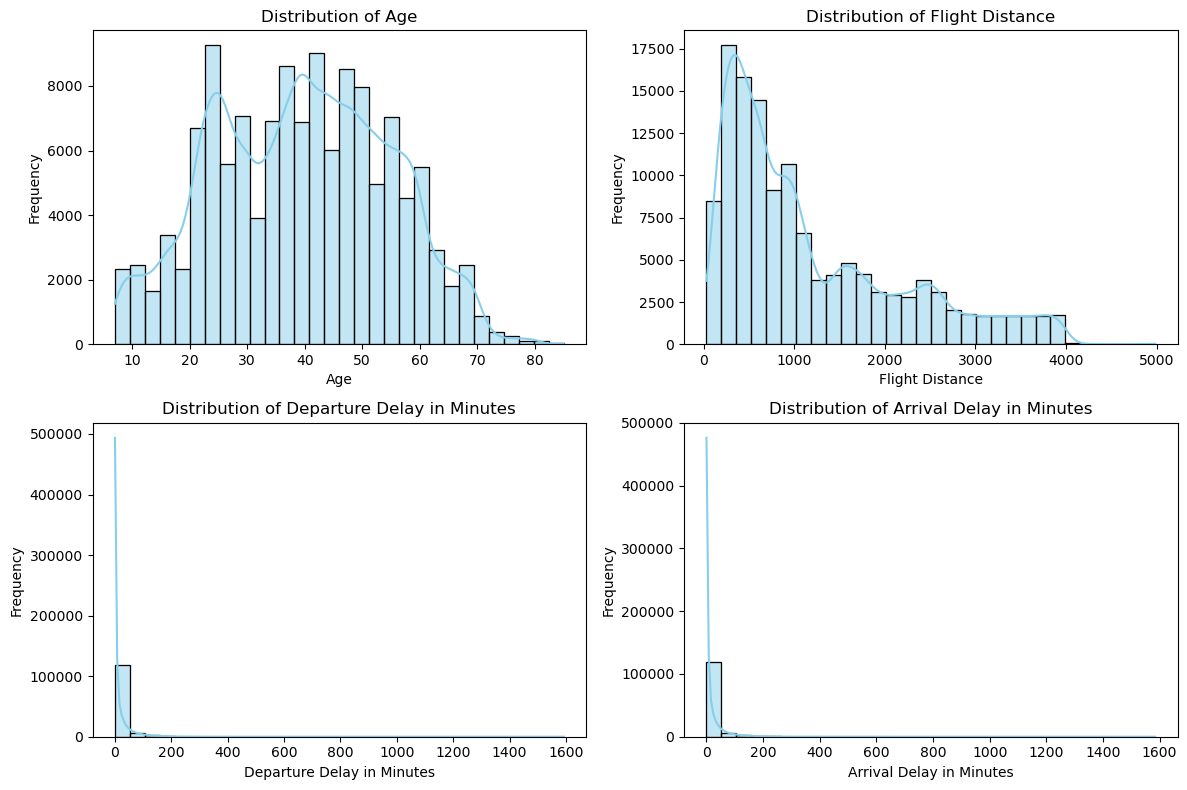

In [114]:

continuous_variables = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']  # Add more continuous variables if necessary

# Histogram

plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[var], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### Log Trasnformation for positively skewed data

- Since the variables depature and arrival , flight distance are heavily positively skewed, lets try applying log transformation

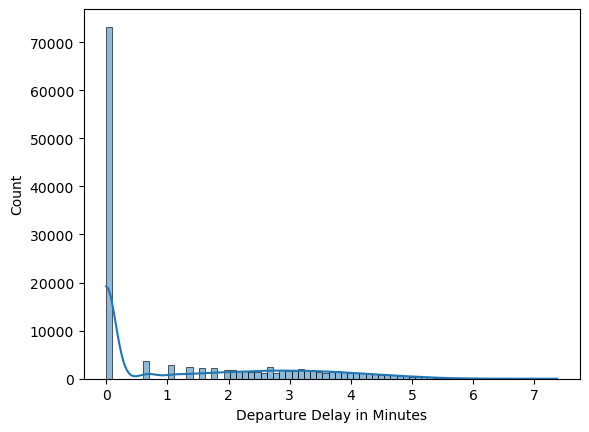

In [225]:
df['Flight Distance'] = df['Flight Distance'].apply(lambda x: np.log(x + 1))
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].apply(lambda x: np.log(x + 1))
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].apply(lambda x: np.log(x + 1))

sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.show()


#### Feature Encoding 

In [227]:
columns_to_encode = ["satisfaction","Gender","Customer Type","Type of Travel","Class"]

for col in columns_to_encode:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    l = list(le.classes_)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,5.081404,5,4,3,4,...,5,5,5,5,2,5,5,3.931826,3.806662,1
1,0,0,36,0,0,7.959975,1,1,3,1,...,4,4,4,4,3,4,5,0.000000,0.000000,1
2,1,1,20,0,1,5.262690,2,0,2,4,...,2,4,1,3,2,2,2,0.000000,0.000000,0
3,1,0,44,0,0,8.125039,0,0,0,2,...,1,1,1,1,3,1,4,0.000000,1.945910,1
4,0,0,49,0,1,7.075809,2,3,4,3,...,2,2,2,2,4,2,4,0.000000,3.044522,1


#### Correlation matrix to analyse highly correlated variables and address multicollinearity.

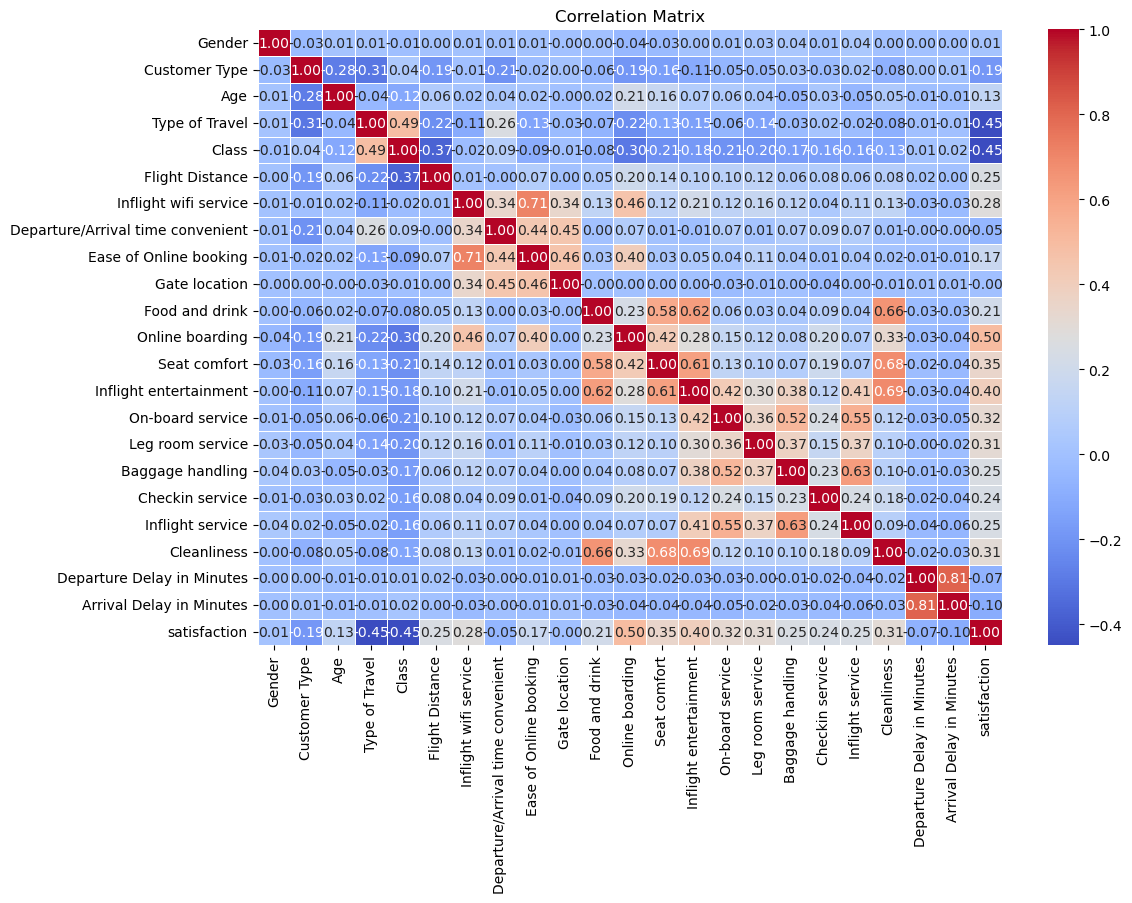

In [229]:
numeric_columns = df.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Checking Variance inflation factor

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numeric_columns = df.select_dtypes(include=['number'])

X = add_constant(numeric_columns)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                              Feature         VIF
0                               const  123.635937
1                              Gender    1.011254
2                       Customer Type    1.628108
3                                 Age    1.165620
4                      Type of Travel    2.132951
5                               Class    1.681429
6                     Flight Distance    1.242711
7               Inflight wifi service    2.515299
8   Departure/Arrival time convenient    1.675212
9              Ease of Online booking    2.729518
10                      Gate location    1.508016
11                     Food and drink    2.174057
12                    Online boarding    2.104811
13                       Seat comfort    2.396309
14             Inflight entertainment    3.895760
15                   On-board service    1.790310
16                   Leg room service    1.333054
17                   Baggage handling    1.911826
18                    Checkin service    1.246254


In [231]:

to_drop = set()

threshold = 0.8  
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]  
            to_drop.add(colname)

df = df.drop(columns=to_drop)

print("Dropped features due to high correlation:", to_drop)


Dropped features due to high correlation: {'Arrival Delay in Minutes'}


Since the VIF values for departure delay and arrival delay are highly correlated, let's drop arrival delay to reduce multicollinearity.

#### Train and Test Split 

In [169]:
from sklearn.model_selection import train_test_split


X = df_01.drop('satisfaction', axis=1)  
y = df['satisfaction']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 103589
Test set size: 25898


### Logistic Regression Model

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14645
           1       0.87      0.83      0.85     11253

    accuracy                           0.87     25898
   macro avg       0.87      0.87      0.87     25898
weighted avg       0.87      0.87      0.87     25898

Accuracy: 0.8714958684068268


Accuracy:
- 0.87 – The model correctly predicts the class in 87.3% of all cases.

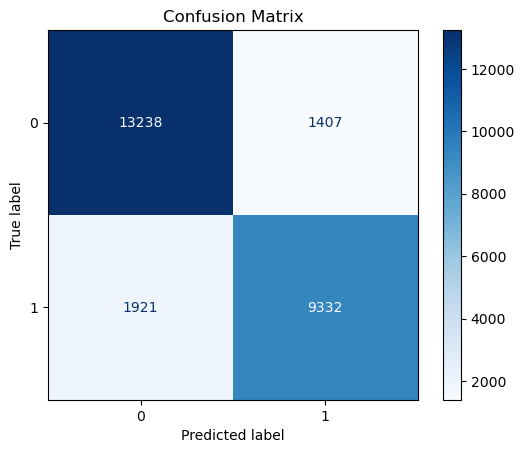

In [174]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)

disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

True Positives (TP): 
- 9332 – Satisfied passengers correctly classified as satisfied.
  
True Negatives (TN): 
- 13238 – Dissatisfied passengers correctly classified as dissatisfied.

False Positives (FP): 
- 1407 – Dissatisfied passengers incorrectly classified as satisfied.

False Negatives (FN): 
- 1921 – Satisfied passengers incorrectly classified as dissatisfied.

Class 0 (not satisfied) Performance:

- High recall 91% indicates that the model captures the majority of dissatisfied passengers, but 1407 instances are misclassified as satisfied.

Class 1 (satisfied) Performance:

- Lower recall 83%  compared to class 0 indicates that a greater proportion of satisfied passengers are misclassified as dissatisfied 1921 instances.
Overall Balance:

The confusion matrix shows that the model performs well overall, but there is a slight bias toward predicting class 0 (dissatisfied) more accurately than class 1 (satisfied)


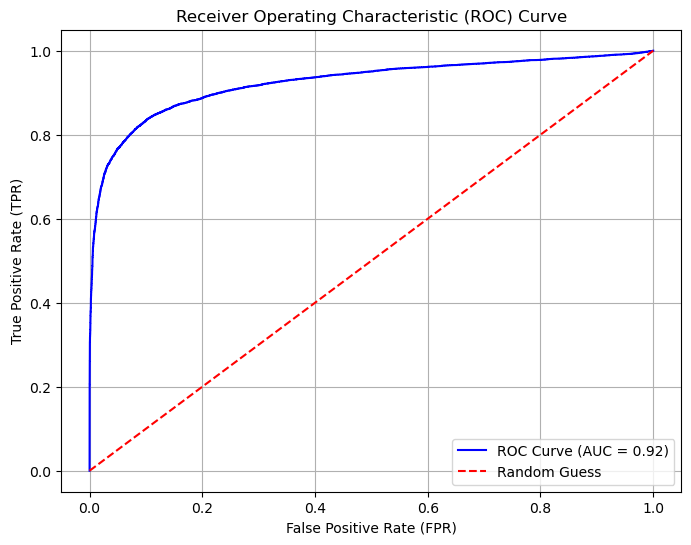

In [179]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


The AUC of 0.92 indicates that the model is performing  well in distinguishing classes.

In [203]:
train_preds = lr_model.predict(X_train)
test_preds = lr_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8749191516473757
Test Accuracy: 0.8714958684068268


The Model is not Overfitting and generalizes well to unseen data.

#### Cross Validation

In [213]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(lr_model, X, y, cv=5)

print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")

Cross-validation scores: [0.87157309 0.87346513 0.87419392 0.87218597 0.87848013]
Mean cross-validation score: 0.8739796498573048


### Random Forest Classification

In [186]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14645
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

Accuracy: 0.9620047880145185


- The Random Forest model demonstrates strong performance, achieving an overall accuracy of 96%.

- For class 0 (dissatisfied) the precision is 95%, and the recall is 98% indicating that the model is excellent at correctly identifying non-satisfied customers.

- For class 1 (satisfied) the precision is 97%, and the recall is 94%, showing it is highly effective at identifying satisfied customers, though it misses a small proportion of them.

- The weighted averages across precision, recall, and F1-score are consistently 96%, indicating balanced and reliable performance for both classes.

#### This suggests the model is well-suited for predicting customer satisfaction.

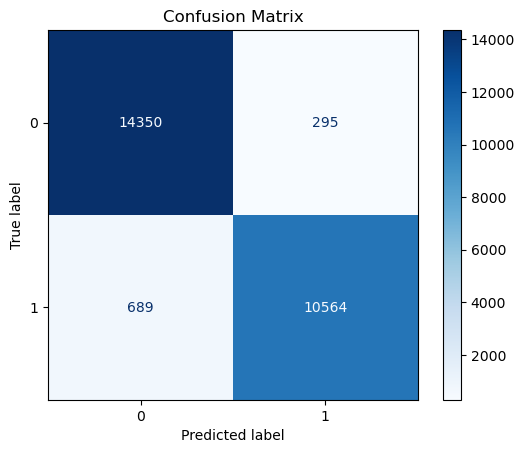

In [188]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


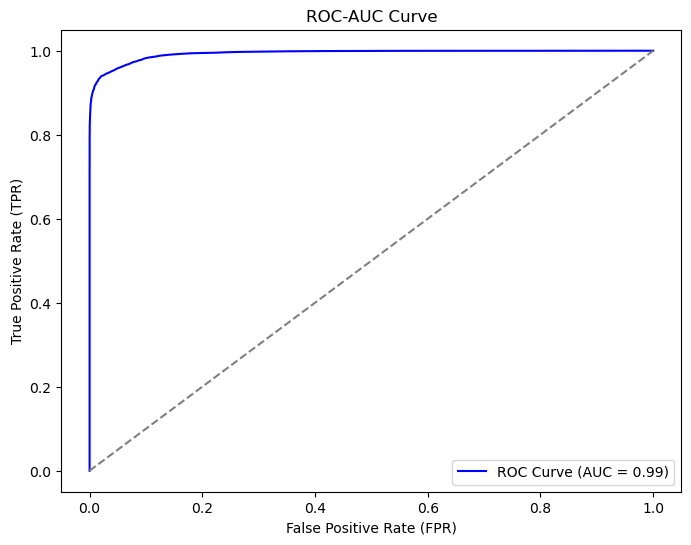

In [190]:
from sklearn.metrics import roc_curve, auc

y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

The AUC of 0.99 indicates that the model is performing really well in distinguishing classes.

#### Evaluating the Model prediction on Train and Test set

In [201]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9999903464653583
Test Accuracy: 0.9620047880145185


#### Cross Validation

In [197]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(rf_model, X, y, cv=5)

print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")


Cross-validation scores: [0.96308595 0.96200479 0.96358652 0.96312314 0.96555586]
Mean cross-validation score: 0.9634712507955315


The model may have overfitted to the training data, as indicated by the very high training accuracy.
However, the cross-validation results and test accuracy suggest that the model is actually not overfitting in terms of generalizing to new data.

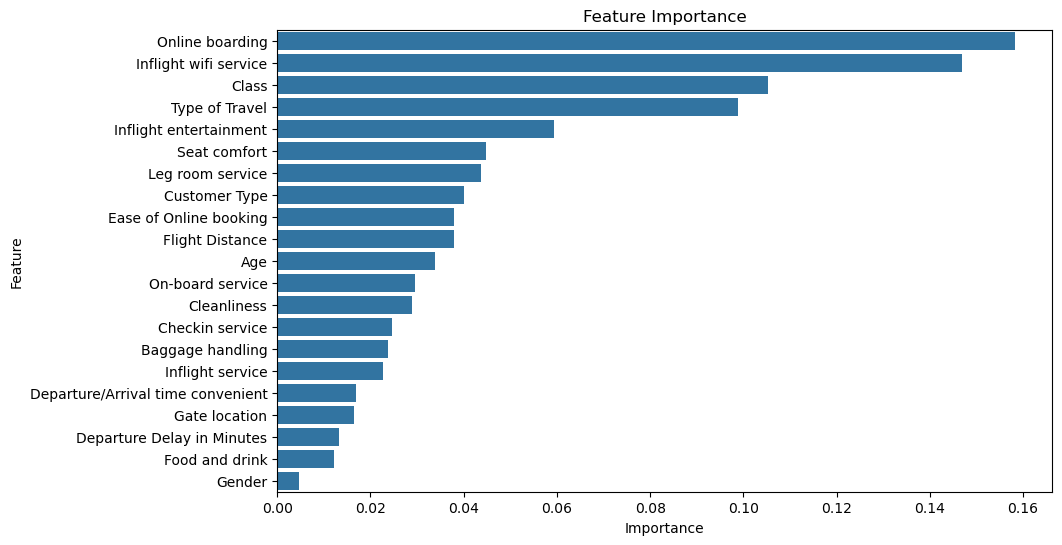

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


The features online boarding , wifi service , class , type of travel , entertainment are the top 5 features that highly influence the satisfaction level in the customers

#### Hyper Parameter Tuning

In [195]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test)

print("Best Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14645
           1       0.97      0.94      0.95     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



#### Conclusion


##### Comparing both the Models Random Forrest provides better accuracy and Predictions.